# Data cleaning for question 3:  What are the Top Studios in Terms of Domestic and Worldwide Gross Profits?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataframe from csv file using pd.read_csv function and review dataframe

In [2]:
bom_df = pd.read_csv('/Users/Gabby/Flatiron/project_1/dsc-phase-1-project-online/zippedData/bom.movie_gross.csv')

In [3]:
#reviewing bom_df
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
#checking for duplicates
duplicates = bom_df[bom_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


**No duplicate rows.**

In [5]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**bom_df.info() shows that there are some missing values in 'studio', 'domestic_gross', and 'foreign_gross columns'**

## Dealing with missing values in 'domestic_gross' and 'foreign_gross' columns using median

*The best way of dealing with missing values in 'domestic_gross' and 'foreign_gross' columns is to replace them with the median of the column since the median is lest likely to influence the distribution of the data.*

In [6]:
#replacing Nan values in 'domestic_gross' column with its median
dom_median = bom_df['domestic_gross'].median()
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(dom_median)

#replacing Nan values in 'foreign_gross' column with its median
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(",","").astype(float)

for_median = bom_df['foreign_gross'].median()
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(for_median)

## Dealing with missing values in the 'studio' column using mode


*The best way of dealing with missing values in the studio column is to replace them with the mode of the column since it is categorical data.*

In [7]:
studio_mode = bom_df['studio'].mode()[0]
bom_df['studio'].fillna(studio_mode, inplace = True)

In [8]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


**bom_df.info and bom_df.head() show that the 'foreign_gross' column has been converted from an object to a float.**

## Check for extraneous values in columns of bom_df

*Extraneous values in columns can be the result of placeholder values. We want to make sure we do not have any so our data is as accurate as possible.*

In [10]:
#check extraneous values
for col in bom_df.columns:
    print(col, '\n', bom_df[col].value_counts().head(), '\n\n')

title 
 Bluebeard                         2
Until Forever                     1
In Bloom                          1
Transformers: Dark of the Moon    1
Chloe                             1
Name: title, dtype: int64 


studio 
 IFC      171
Uni.     147
WB       140
Magn.    136
Fox      136
Name: studio, dtype: int64 


domestic_gross 
 1400000.0    51
1100000.0    32
1000000.0    30
1300000.0    30
1200000.0    25
Name: domestic_gross, dtype: int64 


foreign_gross 
 18700000.0    1352
1200000.0       23
1100000.0       14
1900000.0       12
4200000.0       12
Name: foreign_gross, dtype: int64 


year 
 2015    450
2016    436
2012    400
2011    399
2014    395
Name: year, dtype: int64 




In [11]:
#check to make sure there are no longer any Nan values
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [20]:
bom_df['studio'].nunique()

257

## Calcuate 'total_revenue' by adding 'domestic_gross' and	'foreign_gross' column values together per movie 'title

In [12]:
bom_df['total_revenue'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [13]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
 5   total_revenue   3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [25]:
grouped_df = bom_df.groupby(['studio'])['domestic_gross', 'foreign_gross'].sum()

# pandas.DataFrame.nlargest(n, columns)
grouped_df.nlargest(30,'total_revenue') # you want the top 30 from total revenue

grouped_df.head()

/Users/Gabby/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,domestic_gross,foreign_gross
studio,,
3D,6100000.0,9900000.0
A23,164200.0,37400000.0
A24,324194200.0,799462200.0
ADC,248200.0,37400000.0
AF,2142900.0,78300000.0
...,...,...
Free,75333800.0,157782000.0
GK,10365300.0,392462700.0
Gaatri,898000.0,18700000.0


In [23]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 3D to Zeit.
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  257 non-null    float64
 1   foreign_gross   257 non-null    float64
dtypes: float64(2)
memory usage: 6.0+ KB


In [ ]:
sns.scatterplot(data = grouped_df, x= )

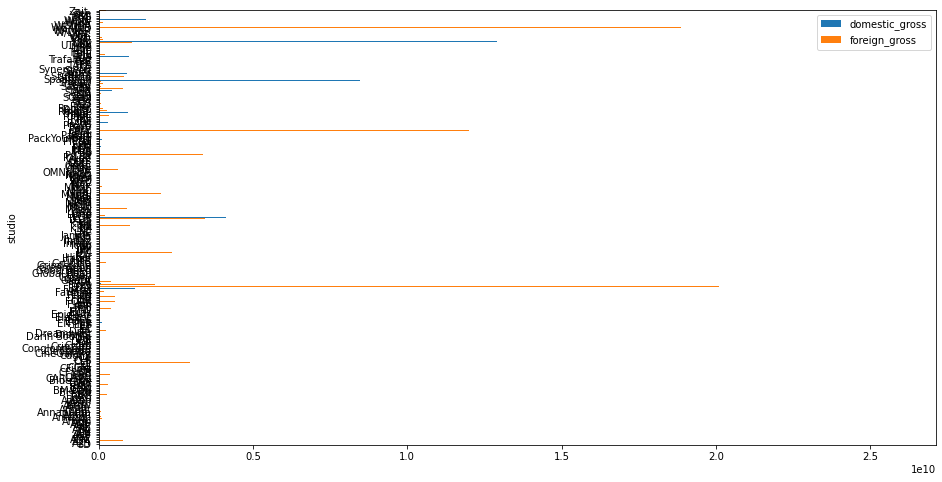

In [22]:
grouped_df.plot(kind='barh', figsize=(15,8))
plt.show()

[Text(0.5, 0, 'Studio'), Text(0, 0.5, 'foreign gross')]

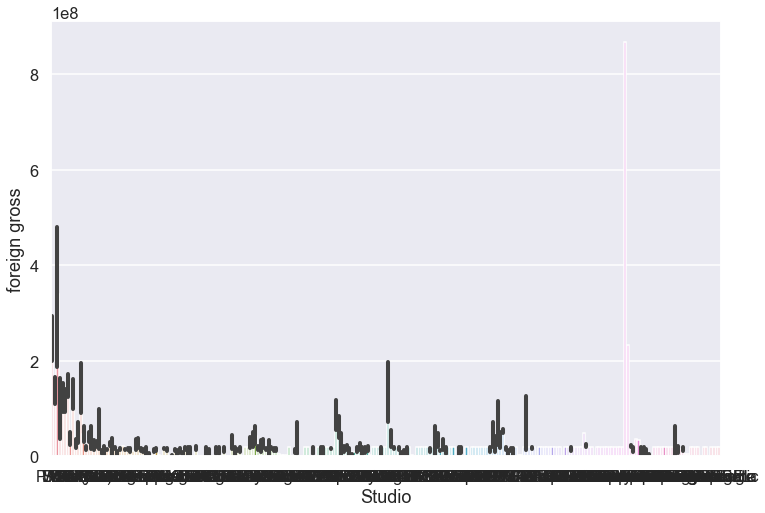

In [15]:
sns.set(style='darkgrid')
sns.set_context('talk')
# fig, ax = plt.subplots(figsize = (12, 8))
foreign_plot =  sns.barplot(x="studio", y='foreign_gross',  data=bom_df, ax=ax)
ax.set(xlabel = 'Studio',
       ylabel = 'foreign gross')

In [22]:
bom_grouped = bom_df.groupby(['studio','domestic_gross', 'foreign_gross'])
bom_grouped.head()

# Bom_pivot = bom_df.pivot(index='studios', columns = ['domestic_gross', 'foreign_gross'], values = 'total_revenue' )

,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018,1.870620e+07
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018,1.870480e+07
3384,El Pacto,Sony,2500.0,18700000.0,2018,1.870250e+07
3385,The Swan,Synergetic,2400.0,18700000.0,2018,1.870240e+07


## Using Seaborn, plot a bar graph of the data

In [ ]:
sns.set(style='darkgrid')
sns.set_context('talk')
# fig, ax = plt.subplots(figsize = (12, 8))
studio_revenue_plot =  sns.barplot(x="studio", hue="total_revenue", y='total_revenue',  data=bom_df)
ax.set(title = 'Top Grossing Studios',
       xlabel = 'Studio',
       ylabel = 'Total Revenue')